In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, explained_variance_score
from sklearn.metrics import mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance, max_error

df = pd.read_csv("pred.csv")
df.iloc[20:25, :]


,Date,Close,High,Low,Open,Volume,y,bool,pred,p_bool,right
20,2021-04-13,1.317412,1.309918,1.312010,1.301362,0.978657,1.381970,1,1.297900,0,False
21,2021-04-14,1.381970,1.390684,1.358914,1.345877,1.902996,1.368336,0,1.298682,0,True
22,2021-04-15,1.368337,1.367210,1.380345,1.386382,1.391785,1.355505,0,1.329430,0,True
23,2021-04-16,1.355505,1.377554,1.366597,1.383976,1.338724,1.348287,0,1.333436,0,True
24,2021-04-19,1.348288,1.356070,1.347188,1.359513,1.165293,1.300571,0,1.330813,0,True


In [18]:
def adjusted_r2(y_test, y_pred, n_features):
  adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (len(y_test) - n_features - 1))
  return adj_r2


print("MSE = " + str(mean_squared_error(df['y'], df['pred'])))
print("RMSE = " + str(mean_squared_error(df['y'], df['pred'], squared=False)))
print("MAPE = " + str(mean_absolute_percentage_error(df['y'], df['pred']) * 100))
print("R2 = " + str(r2_score(df['y'], df['pred'])))
print("adjust R2 = " + str(adjusted_r2(df['y'], df['pred'], 105)))
print("RMSLE = " + str(mean_squared_log_error(df['y'], df['pred'])))
print("explained_variance_score = " + str(explained_variance_score(df['y'], df['pred'])))
print("mean_poisson_deviance = " + str(mean_poisson_deviance(df['y'], df['pred'])))
print("mean_gamma_deviance = " + str(mean_gamma_deviance(df['y'], df['pred'])))
print("mean_tweedie_deviance = " + str(mean_tweedie_deviance(df['y'], df['pred'])))
print("max_error = " + str(max_error(df['y'], df['pred'])))


print("\n")
print(df['right'].value_counts(normalize=True) * 100)
print(df['right'].value_counts())

MSE = 0.003275319556429679
RMSE = 0.05723040762068429
MAPE = 3.1953630045219423
R2 = 0.7551389328840645
adjust R2 = -0.36270506916694534
RMSLE = 0.000559854462984395
explained_variance_score = 0.75924000254372
mean_poisson_deviance = 0.0023204291698330393
mean_gamma_deviance = 0.0016577114081935127
mean_tweedie_deviance = 0.003275319556429679
max_error = 0.1557910245431844


True     52.713178
False    47.286822
Name: right, dtype: float64
True     68
False    61
Name: right, dtype: int64


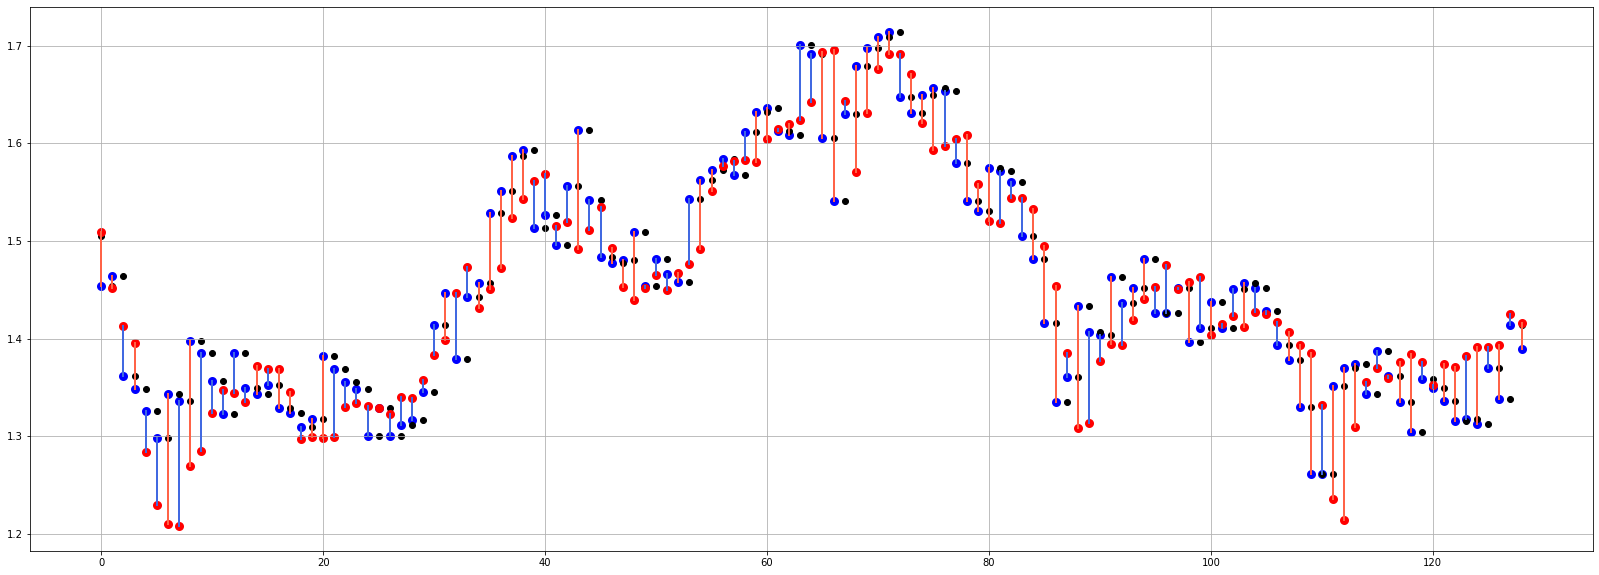

In [19]:
plt.figure(figsize=(28, 10))

for i, val in df.iterrows():
    color = 'royalblue' if val[10] else 'tomato'
    plt.plot([i, i], [val[6], val[8]], label = "pred", linewidth=2, color=color)
    plt.scatter(i, val[6], label = "pred", linewidth=3, color='blue') # final 
    plt.scatter(i, val[1], label = "pred", linewidth=1, color='k') # inicio
    plt.scatter(i, val[8], label = "pred", linewidth=3, color='red') # valor esperado / pred

plt.grid(True)
plt.show()

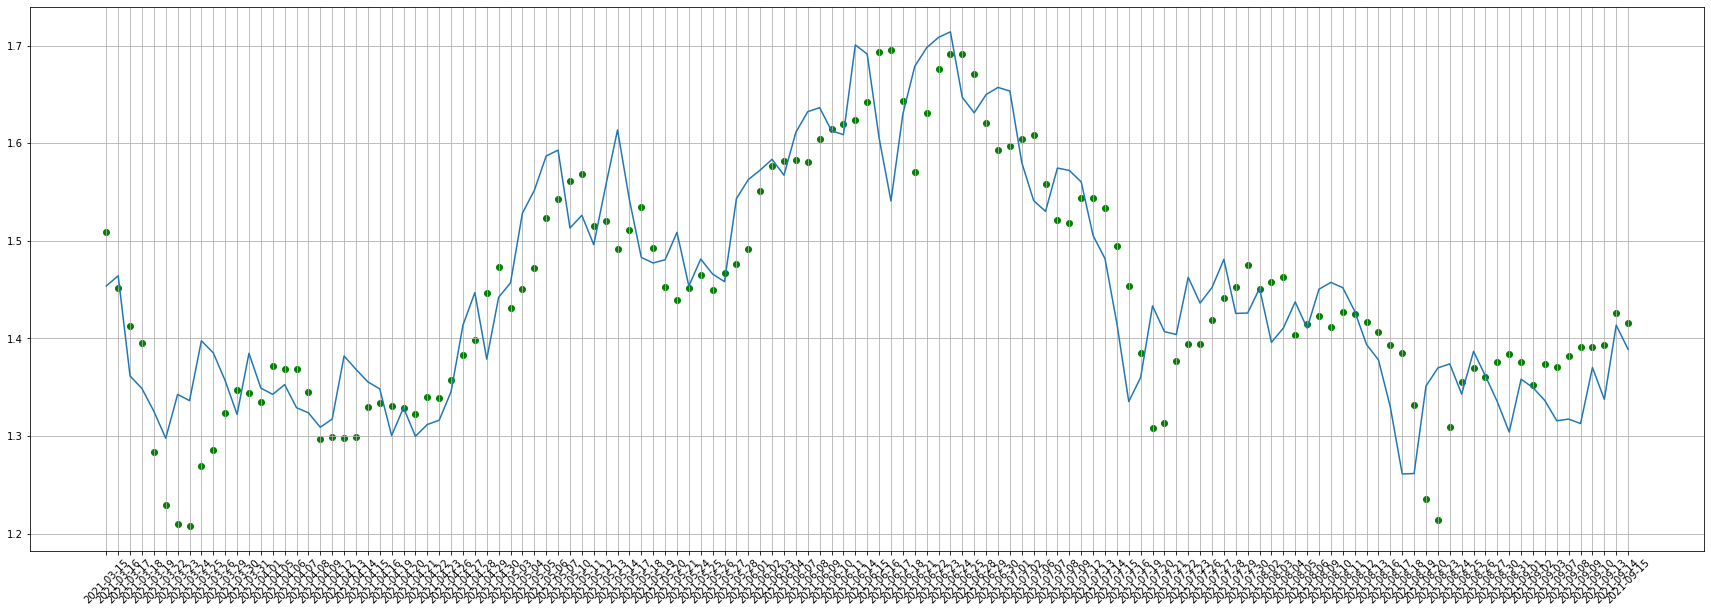

In [20]:
plt.figure(figsize=(30, 10))

plt.plot(df['Date'], df.y, label = "y")
plt.scatter(df['Date'], df.pred, label = "pred", color='green')
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()